In [2]:
import pandas as pd
import seaborn as sns
import sourmash
import sourmash.lca.lca_utils as lca_utils
import sourmash.tax.tax_utils as tax_utils
from tqdm import tqdm
tqdm.pandas()

In [5]:
pathinfo = pd.read_csv("gtdb-r95-reps.pathinfo.tsv", sep="\t")
pathinfo

,accession,path,rank,lineage
0,GCA_003661365.1,path1,superkingdom,d__Archaea;p__Thermoproteota;c__Korarchaeia;o_...
1,GCA_001940645.1,path1,phylum,d__Archaea;p__Asgardarchaeota;c__Heimdallarcha...
2,GCA_005191425.1,path1,class,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...
3,GCA_004524545.1,path1,order,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...
4,GCA_004375715.1,path1,family,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...


In [7]:
anchors = pathinfo[pathinfo["rank"] == "species"]
anchors

,accession,path,rank,lineage
6,GCA_004524385.1,path1,species,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...
13,GCA_004375715.1,path2,species,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...
20,GCA_002507545.1,path3,species,d__Archaea;p__Halobacteriota;c__Archaeoglobi;o...
27,GCA_002011235.1,path4,species,d__Archaea;p__Halobacteriota;c__Archaeoglobi;o...
34,GCF_000025285.1,path5,species,d__Archaea;p__Halobacteriota;c__Archaeoglobi;o...
...,...,...,...,...
20670,GCA_002708885.1,path2953,species,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...
20677,GCA_002482965.1,path2954,species,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...
20684,GCF_000172155.1,path2955,species,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...
20691,GCA_002421425.1,path2956,species,d__Bacteria;p__WOR-3;c__Hydrothermia;o__UBA106...


In [46]:
anchor2lin = anchors[["accession","path", "lineage"]]
anchor2lin

,accession,path,lineage
6,GCA_004524385.1,path1,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...
13,GCA_004375715.1,path2,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...
20,GCA_002507545.1,path3,d__Archaea;p__Halobacteriota;c__Archaeoglobi;o...
27,GCA_002011235.1,path4,d__Archaea;p__Halobacteriota;c__Archaeoglobi;o...
34,GCF_000025285.1,path5,d__Archaea;p__Halobacteriota;c__Archaeoglobi;o...
...,...,...,...
20670,GCA_002708885.1,path2953,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...
20677,GCA_002482965.1,path2954,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...
20684,GCF_000172155.1,path2955,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...
20691,GCA_002421425.1,path2956,d__Bacteria;p__WOR-3;c__Hydrothermia;o__UBA106...


In [22]:
anchor_lineages = list(anchors["lineage"])
len(anchor_lineages)

2957

In [25]:
anchor_lineages[10]

'd__Archaea;p__Halobacteriota;c__Methanosarcinia;o__Methanosarcinales;f__Methanoperedenaceae;g__Methanoperedens;s__Methanoperedens nitroreducens'

# Extend evolpaths

evolutionary paths used _representative_ genomes. The goal of this notebook is to add in the comparison of non-representative genomes to the path's anchor genome, so that we can include a "species-level" comparison in the plot

I should have nearly all species-level comparisons in the "phylum-compare" csv...

In [12]:
# I think this is protein k10
phylum_compare = pd.read_csv('gtdb-rs202.most-phyla.compare.with-lineages.csv', index_col=0)
phylum_compare

,g1,g2,similarity,max_containment,lca_rank,lca_lin
0,GCA_002084765.1,GCA_002084765.1,0.000000,1.000000,species,d__Bacteria;p__4572-55;c__4572-55;o__4572-55;f...
1,GCA_003697105.1,GCA_003697105.1,0.000000,1.000000,species,d__Bacteria;p__4572-55;c__4572-55;o__J002;f__J...
2,GCA_002084765.1,GCA_003697105.1,0.005815,0.008694,class,d__Bacteria;p__4572-55;c__4572-55
4,GCA_013202285.1,GCA_013202315.1,0.004995,0.007092,phylum,d__Bacteria;p__AABM5-125-24
5,GCA_003818605.1,GCA_013202285.1,0.003438,0.005674,phylum,d__Bacteria;p__AABM5-125-24
...,...,...,...,...,...,...
18311251,GCA_003520965.1,GCA_008501655.1,0.005957,0.010126,class,d__Bacteria;p__Zixibacteria;c__MSB-5A5
18311252,GCA_012517955.1,GCA_903827795.1,0.008479,0.014914,class,d__Bacteria;p__Zixibacteria;c__MSB-5A5
18311253,GCA_903823345.1,GCF_900498245.1,0.013791,0.020692,class,d__Bacteria;p__Zixibacteria;c__MSB-5A5
18311254,GCA_903823345.1,GCA_903921635.1,0.850266,0.987619,species,d__Bacteria;p__Zixibacteria;c__MSB-5A5;o__CAIY...


Let's see if a few exist...

In [13]:
species_comp_only = phylum_compare[phylum_compare["lca_rank"] == "species"]

In [27]:
species_comp_only[species_comp_only["lca_lin"] == "d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;o__CR-4;f__SOKP01;g__SDNM01;s__SDNM01 sp004524385"]

,g1,g2,similarity,max_containment,lca_rank,lca_lin
691119,GCA_004524385.1,GCA_004524385.1,0.0,1.0,species,d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;...


In [28]:
species_comp_only[species_comp_only["lca_lin"] == "d__Archaea;p__Halobacteriota;c__Methanosarcinia;o__Methanosarcinales;f__Methanoperedenaceae;g__Methanoperedens;s__Methanoperedens nitroreducens"]

,g1,g2,similarity,max_containment,lca_rank,lca_lin
5829633,GCA_002496325.1,GCA_002496325.1,0.000000,1.000000,species,d__Archaea;p__Halobacteriota;c__Methanosarcini...
5850219,GCA_002496325.1,GCF_000685155.1,0.811746,0.971073,species,d__Archaea;p__Halobacteriota;c__Methanosarcini...
6377174,GCF_000685155.1,GCF_000685155.1,0.000000,1.000000,species,d__Archaea;p__Halobacteriota;c__Methanosarcini...


So not all species have >1 species in gtdb 95...

In [ ]:
# let's eliminate all g1 == g2

In [29]:
pcomp = phylum_compare.query("g1 != g2")
pcomp.shape

(18284460, 6)

In [30]:
spcomp = pcomp[pcomp["lca_rank"] == "species"]

In [31]:
# so this one shouldn't exist
spcomp[spcomp["lca_lin"] == "d__Archaea;p__Asgardarchaeota;c__Lokiarchaeia;o__CR-4;f__SOKP01;g__SDNM01;s__SDNM01 sp004524385"]

,g1,g2,similarity,max_containment,lca_rank,lca_lin


In [39]:
# this should have a single comparison
spcomp[spcomp["lca_lin"] == "d__Archaea;p__Halobacteriota;c__Methanosarcinia;o__Methanosarcinales;f__Methanoperedenaceae;g__Methanoperedens;s__Methanoperedens nitroreducens"]

,g1,g2,similarity,max_containment,lca_rank,lca_lin
5850219,GCA_002496325.1,GCF_000685155.1,0.811746,0.971073,species,d__Archaea;p__Halobacteriota;c__Methanosarcini...


In [38]:
spcomp.shape

(147185, 6)

In [78]:
mean_spcomp = spcomp.groupby("lca_lin")[["similarity", "max_containment"]].mean().reset_index()
mean_spcomp.rename(columns={"lca_lin":"lineage", "similarity": "jaccard"}, inplace=True)
mean_spcomp

,lineage,jaccard,max_containment
0,d__Archaea;p__Aenigmatarchaeota;c__Aenigmatarc...,0.665188,0.884568
1,d__Archaea;p__Aenigmatarchaeota;c__Aenigmatarc...,0.440860,0.740966
2,d__Archaea;p__Aenigmatarchaeota;c__Aenigmatarc...,0.649656,0.952068
3,d__Archaea;p__Aenigmatarchaeota;c__Aenigmatarc...,0.528965,0.765366
4,d__Archaea;p__Aenigmatarchaeota_A;c__Aenigmata...,0.540364,0.825198
...,...,...,...
4218,d__Bacteria;p__Zixibacteria;c__MSB-5A5;o__CAIY...,0.824189,0.981531
4219,d__Bacteria;p__Zixibacteria;c__MSB-5A5;o__GN15...,0.535045,0.799137
4220,d__Bacteria;p__Zixibacteria;c__MSB-5A5;o__MSB-...,0.721172,0.996629
4221,d__Bacteria;p__Zixibacteria;c__MSB-5A5;o__MSB-...,0.932308,0.997346


In [ ]:
spcomp.drop(columns = ["g1", "g2"], inplace=True)



In [84]:
spcomp.rename(columns={"lca_lin":"lineage", "similarity": "jaccard", "lca_rank": "lowest_common_rank"}, inplace=True)
spcomp

/Users/tessa/opt/miniconda3/envs/2021-rank-compare-nb/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,jaccard,max_containment,lowest_common_rank,lineage
61,0.827904,0.965950,species,d__Bacteria;p__Acidobacteriota;c__Acidobacteri...
372,0.949966,0.998325,species,d__Bacteria;p__Acidobacteriota;c__Holophagae;o...
639,0.663898,0.869225,species,d__Bacteria;p__Acidobacteriota;c__Acidobacteri...
1139,0.653428,0.922110,species,d__Bacteria;p__Acidobacteriota;c__Acidobacteri...
1302,0.894985,0.998966,species,d__Bacteria;p__Acidobacteriota;c__Holophagae;o...
...,...,...,...,...
18311212,0.855204,0.983105,species,d__Bacteria;p__Zixibacteria;c__MSB-5A5;o__CAIY...
18311216,0.836395,0.983720,species,d__Bacteria;p__Zixibacteria;c__MSB-5A5;o__CAIY...
18311219,0.613459,0.835523,species,d__Bacteria;p__Zixibacteria;c__MSB-5A5;o__UBA1...
18311227,0.808304,0.975266,species,d__Bacteria;p__Zixibacteria;c__MSB-5A5;o__CAIY...


In [ ]:
#mean_spcomp.rename(columns={"lca_lin":"lineage", "similarity": "jaccard"}, inplace=True)
#mean_spcomp

In [85]:
merged = pd.merge(spcomp, anchor2lin, on="lineage" )
merged.rename(columns={"accession":"anchor_name"}, inplace=True)
#merged["lowest_common_rank"] = "species"
merged

,jaccard,max_containment,lowest_common_rank,lineage,anchor_name,path
0,0.592352,0.834738,species,d__Bacteria;p__Acidobacteriota;c__Acidobacteri...,GCA_003162875.1,path98
1,0.647177,0.869777,species,d__Bacteria;p__Acidobacteriota;c__Acidobacteri...,GCA_003162875.1,path98
2,0.567324,0.871144,species,d__Bacteria;p__Acidobacteriota;c__Acidobacteri...,GCA_003162875.1,path98
3,0.613888,0.886011,species,d__Bacteria;p__Acidobacteriota;c__Acidobacteri...,GCA_003162875.1,path98
4,0.593336,0.805270,species,d__Bacteria;p__Acidobacteriota;c__Acidobacteri...,GCA_003162875.1,path98
...,...,...,...,...,...,...
3955,0.588117,0.819265,species,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,GCA_002721895.1,path2940
3956,0.552147,0.931152,species,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,GCF_000172155.1,path2955
3957,0.594017,0.885002,species,d__Bacteria;p__Verrucomicrobiota;c__Lentisphae...,GCA_900549045.1,path2902
3958,0.601833,0.846512,species,d__Bacteria;p__Verrucomicrobiota;c__Verrucomic...,GCA_900546565.1,path2915


In [86]:
merged['path'].nunique()

207

In [57]:
prot_pathcomp = pd.read_csv("gtdb95-evolpaths.pathcompare.protein-input.csv.gz")
prot_pathcomp

,comparison_name,anchor_name,ref_name,path,lowest_common_rank,alphabet,ksize,scaled,jaccard,max_containment,anchor_containment,anchor_hashes,query_hashes,num_common,alpha-ksize
0,GCA_004524385.1_x_GCA_004524535.1,GCA_004524385.1,GCA_004524535.1,path1,genus,protein,7,100,0.261496,0.613636,0.613636,5236,10264,3213,protein-7
1,GCA_004524385.1_x_GCA_004375715.1,GCA_004524385.1,GCA_004375715.1,path1,family,protein,7,100,0.026196,0.068182,0.068182,5236,8749,357,protein-7
2,GCA_004524385.1_x_GCA_004524545.1,GCA_004524385.1,GCA_004524545.1,path1,order,protein,7,100,0.007171,0.017189,0.017189,5236,7404,90,protein-7
3,GCA_004524385.1_x_GCA_005191425.1,GCA_004524385.1,GCA_005191425.1,path1,class,protein,7,100,0.007075,0.019672,0.019672,5236,9426,103,protein-7
4,GCA_004524385.1_x_GCA_001940645.1,GCA_004524385.1,GCA_001940645.1,path1,phylum,protein,7,100,0.003614,0.013369,0.013369,5236,14203,70,protein-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177415,GCA_004376785.1_x_GCA_001303785.1,GCA_004376785.1,GCA_001303785.1,path2957,family,hp,35,100,0.029491,0.066934,0.066934,5229,6989,350,hp-35
177416,GCA_004376785.1_x_GCA_003645615.1,GCA_004376785.1,GCA_003645615.1,path2957,order,hp,35,100,0.005846,0.012813,0.012813,5229,6299,67,hp-35
177417,GCA_004376785.1_x_GCA_002347155.1,GCA_004376785.1,GCA_002347155.1,path2957,class,hp,35,100,0.001075,0.003060,0.003060,5229,9667,16,hp-35
177418,GCA_004376785.1_x_GCA_002774315.1,GCA_004376785.1,GCA_002774315.1,path2957,phylum,hp,35,100,0.001791,0.004747,0.002869,5229,3160,15,hp-35


In [55]:
prot_pathcomp.columns

Index(['comparison_name', 'anchor_name', 'ref_name', 'path',
       'lowest_common_rank', 'alphabet', 'ksize', 'scaled', 'jaccard',
       'max_containment', 'anchor_containment', 'anchor_hashes',
       'query_hashes', 'num_common', 'alpha-ksize'],
      dtype='object')

In [59]:
k10 = prot_pathcomp[prot_pathcomp["ksize"] == 10]
k10.shape

(17742, 15)

In [61]:
keep_cols = ["anchor_name", "path", "jaccard", "lowest_common_rank", "max_containment"]

In [63]:
pathD = prot_pathcomp[keep_cols]
pathD

,anchor_name,path,jaccard,lowest_common_rank,max_containment
0,GCA_004524385.1,path1,0.261496,genus,0.613636
1,GCA_004524385.1,path1,0.026196,family,0.068182
2,GCA_004524385.1,path1,0.007171,order,0.017189
3,GCA_004524385.1,path1,0.007075,class,0.019672
4,GCA_004524385.1,path1,0.003614,phylum,0.013369
...,...,...,...,...,...
177415,GCA_004376785.1,path2957,0.029491,family,0.066934
177416,GCA_004376785.1,path2957,0.005846,order,0.012813
177417,GCA_004376785.1,path2957,0.001075,class,0.003060
177418,GCA_004376785.1,path2957,0.001791,phylum,0.004747


In [87]:
merged.columns

Index(['jaccard', 'max_containment', 'lowest_common_rank', 'lineage',
       'anchor_name', 'path'],
      dtype='object')

In [88]:
merged.drop(columns=["lineage"], inplace=True)
merged.columns

Index(['jaccard', 'max_containment', 'lowest_common_rank', 'anchor_name',
       'path'],
      dtype='object')

In [89]:
allcomp = pd.concat([merged, pathD])
allcomp

,jaccard,max_containment,lowest_common_rank,anchor_name,path
0,0.592352,0.834738,species,GCA_003162875.1,path98
1,0.647177,0.869777,species,GCA_003162875.1,path98
2,0.567324,0.871144,species,GCA_003162875.1,path98
3,0.613888,0.886011,species,GCA_003162875.1,path98
4,0.593336,0.805270,species,GCA_003162875.1,path98
...,...,...,...,...,...
177415,0.029491,0.066934,family,GCA_004376785.1,path2957
177416,0.005846,0.012813,order,GCA_004376785.1,path2957
177417,0.001075,0.003060,class,GCA_004376785.1,path2957
177418,0.001791,0.004747,phylum,GCA_004376785.1,path2957


In [90]:
allcomp[allcomp["path"] == "path3"]

,jaccard,max_containment,lowest_common_rank,anchor_name,path
639,0.778764,0.986128,species,GCA_002507545.1,path3
640,0.802652,0.971995,species,GCA_002507545.1,path3
641,0.779906,0.974819,species,GCA_002507545.1,path3
642,0.839325,0.970919,species,GCA_002507545.1,path3
643,0.846437,0.990317,species,GCA_002507545.1,path3
...,...,...,...,...,...
159691,0.024766,0.059986,family,GCA_002507545.1,path3
159692,0.006542,0.013713,order,GCA_002507545.1,path3
159693,0.006040,0.015617,class,GCA_002507545.1,path3
159694,0.000609,0.001619,phylum,GCA_002507545.1,path3


In [91]:
ascending_taxlist = list(tax_utils.ascending_taxlist(include_strain=False))[:-1]
ascending_taxlist

['species', 'genus', 'family', 'order', 'class', 'phylum']

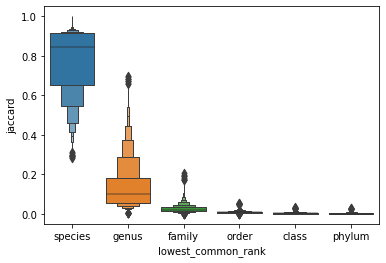

In [93]:
g=sns.boxenplot(data=allcomp, y="jaccard", x="lowest_common_rank", order=ascending_taxlist)

In [ ]:
aai_colors = {"jaccard-AAI":"#89bedc", "maxcontain-AAI":"#0b559f", "anchor-contain-AAI":'#2b7bba', "compareM":"#c44e52"}

sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":15,"axes.titlesize":10,"axes.labelsize":10}):
    sns.set_style("whitegrid")
    #g=sns.violinplot(data=allprot_melt, y="lowest_common_rank", x="AAI", hue="estimator", order=rankorder, dodge=True,inner=None, color=".8")
    g=sns.boxenplot(data=allprot_melt, y="lowest_common_rank", x="AAI", hue="estimator", order=rankorder, dodge=True, palette=aai_colors)
    lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #g.legend_.remove()
    #x = plt.gca().axes.get_xlim()
    #median_width = 0.5
    #order = 3
    #for tick, text in zip(g.get_yticks(), g.get_yticklabels()):
    #    rank = text.get_text()
    #    median_val = allprot_melt.loc[allprot_melt["lowest_common_rank"] == rank].median()['AAI']
    #    g.plot([median_val, median_val],[tick-median_width/2, tick+median_width/2],lw=1.8, color='dimgray', zorder=order)
    #    order+=1

    # format x ticks as %
    plt.gcf().set_size_inches(17, 12)
    g.set(xlim=(0, 1))
    g.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    g.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    plt.xlabel("AAI (%)", size=20, labelpad=15)
    plt.ylabel("Lowest Common Taxon", size=20)
    #g.axis("off")
    #g.spines["right"].set_visible(False)
    #g.spines["top"].set_visible(False)
    #g.spines["left"].set_visible(False)
    #g.spines["bottom"].set_visible(False)
    fig = g.get_figure()
    fig.savefig("gtdb95-evolpaths.AAIcompare.boxen.png",bbox_inches='tight')
    fig.savefig("gtdb95-evolpaths.AAIcompare.boxen.pdf",bbox_inches='tight')

In [ ]:
# let's just grab all  p__Proteobacteria



In [ ]:
#pcomp = phylum_compare.query("g1 != g2")
#pcomp.shape